In [1]:
%matplotlib inline
%autoreload 2 

In [2]:
from __future__ import (division, absolute_import,
                        print_function, unicode_literals)
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
import george
import pandas as pd
import matplotlib.pyplot as plt
from george.kernels import (KappaKappaExpSquaredKernel, 
                            KappaGamma1ExpSquaredKernel,
                            KappaGamma2ExpSquaredKernel,
                            Gamma1Gamma1ExpSquaredKernel,
                            Gamma1Gamma2ExpSquaredKernel,
                            Gamma2Gamma2ExpSquaredKernel,
                            ExpSquaredKernel)
from collections import OrderedDict

In [4]:
import sys
sys.path.append("../")
import sample_and_fit_gp as fit
import diag_plots as plot

put them all inside a dictionary for easy iteration 

In [5]:
Kernels = OrderedDict({})
Kernels[KappaKappaExpSquaredKernel.__name__[:-16]] = \
        KappaKappaExpSquaredKernel

Kernels[KappaGamma1ExpSquaredKernel.__name__[:-16]] = \
        KappaGamma1ExpSquaredKernel

Kernels[KappaGamma2ExpSquaredKernel.__name__[:-16]] = \
        KappaGamma2ExpSquaredKernel
 
Kernels[Gamma1Gamma1ExpSquaredKernel.__name__[:-16]] = \
        Gamma1Gamma1ExpSquaredKernel
    
Kernels[Gamma1Gamma2ExpSquaredKernel.__name__[:-16]] = \
        Gamma1Gamma2ExpSquaredKernel
    
Kernels[Gamma2Gamma2ExpSquaredKernel.__name__[:-16]] = \
        Gamma2Gamma2ExpSquaredKernel

In [6]:
subplot_no = [1, 2, 3, 5, 6, 9]
titles = [r"$\kappa\kappa$", 
              r"$\kappa\gamma_1$",
              r"$\kappa\gamma_2$",
              r"$\gamma_1\gamma_1$",
              r"$\gamma_1\gamma_2$",
              r"$\gamma_2\gamma_2$"]

In [27]:
def initialize_GP_and_do_demo(inv_lambda, beta):     
    GPs = OrderedDict({})
    coords = np.array([[1, i] for i in np.linspace(0, 1, 10)])
    
    
    i = 0
    plt.figure(figsize=(10, 10))
    for k, v in Kernels.iteritems():
        GPs[k] = george.GP(inv_lambda * v([beta, beta], ndim=2))
        sample_mtx = GPs[k].get_matrix(coords)
        pos_def = np.linalg.slogdet(sample_mtx)[0]
        if pos_def == 1.:
            color = 'b'
        else:
            color = 'r'
        
        # print(sample_mtx)
        plt.subplot(3, 3, subplot_no[i])
        plt.plot(range(coords.shape[0]), sample_mtx[:, 4], 'x-',
                 color=color, mew=2)
        plt.ylim(0, 7)
        plt.yticks(fontsize='small')
        plt.xticks(fontsize='small')
        plt.title(titles[i], fontsize=15) #titles[i])
        
        i += 1
   

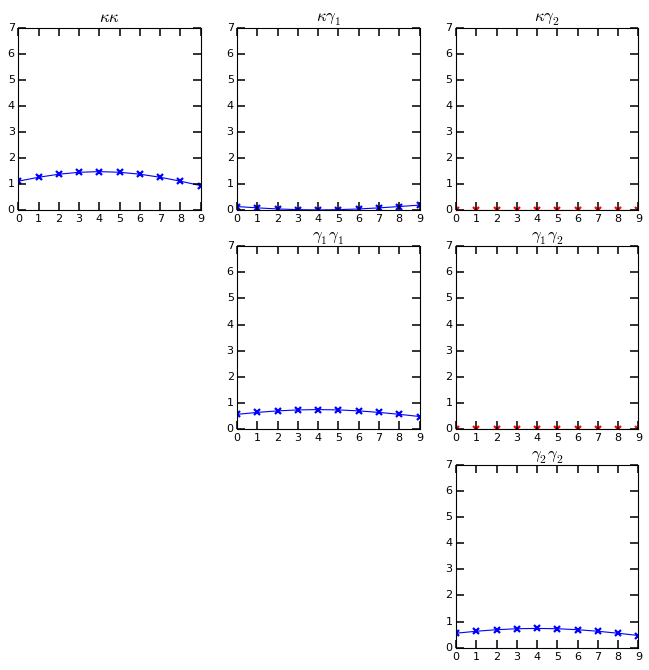

In [28]:
interact(initialize_GP_and_do_demo, inv_lambda=(0.1, 1.5, 0.1),
         beta = (0.1, 1.5, 0.1))

In [29]:
def initialize_GP_and_do_demo(inv_lambda, beta):     
    GPs = OrderedDict({})
    coords = np.array([[i, i] for i in np.linspace(0, 1, 10)])
    
    
    i = 0
    plt.figure(figsize=(10, 10))
    
    # plot the kernel matrices 
    for k, v in Kernels.iteritems():
        GPs[k] = george.GP(inv_lambda * v([beta, beta], ndim=2))
        sample_mtx = GPs[k].get_matrix(coords)
        pos_def = np.linalg.slogdet(sample_mtx)[0]
        if pos_def == 1.:
            color = 'b'
        else:
            color = 'r'
        
        # print(sample_mtx)
        plt.subplot(3, 3, subplot_no[i])
        plt.plot(range(coords.shape[0]), sample_mtx[:, 4], 'x-',
                 color=color, mew=2)
        plt.ylim(0, 7)
        plt.yticks(fontsize='small')
        plt.xticks(fontsize='small')
        plt.title(titles[i], fontsize=15) #titles[i])
        
        i += 1
   

    # plot the Schur complement

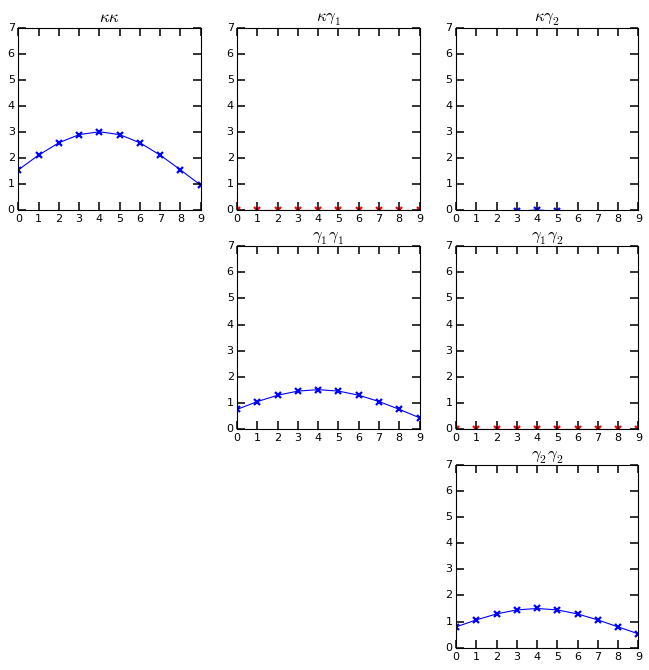

In [30]:
interact(initialize_GP_and_do_demo, inv_lambda=(0.1, 1.5, 0.1),
         beta = (0.1, 1.5, 0.1))